# Diabetes Prediction

### Analysing Data

In [42]:
#Import pandas library

import pandas as pd
import numpy as np

#loading dataset

dataset = pd.read_csv("diabetes_dataset.csv")
display(dataset)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [43]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [44]:
dataset.shape

(768, 9)

In [45]:
dataset.isnull().sum(axis = 0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [46]:
print(dataset.shape)
dataset = dataset.drop_duplicates(keep = 'first')
print(dataset.shape)

(768, 9)
(768, 9)


In [47]:
#feature variables

X = dataset.drop(['Outcome'], axis=1)
Y = dataset.Outcome
display(X)
display(Y)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Decision Tree

In [48]:
#Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split function
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [49]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = model.predict(X_test)

#Evaluation using Confusion matrix and Accuracy Score

from sklearn.metrics import confusion_matrix, accuracy_score
print(f'Confusion Matrix -\n {confusion_matrix(Y_test, Y_pred)}\n')
print(f'Accuracy -\n{accuracy_score(Y_test, Y_pred)*100}%')

Confusion Matrix -
 [[79 20]
 [17 38]]

Accuracy -
75.97402597402598%


In [50]:
#Evaluation using Classification report

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [51]:
#Checking Single Value prediction value
data = [[6,148,72,35,0,33.6,0.627,50]]
Y_pred1 = model.predict(data)

# Model Accuracy
if Y_pred1 == 1: print(f'Prediction for the given data - {data} - {Y_pred1} - Diabetes - Positive')
else: print(f'Prediction for the given data - {data} - {Y_pred1} - Diabetes - Negative')

Prediction for the given data - [[6, 148, 72, 35, 0, 33.6, 0.627, 50]] - [1] - Diabetes - Positive


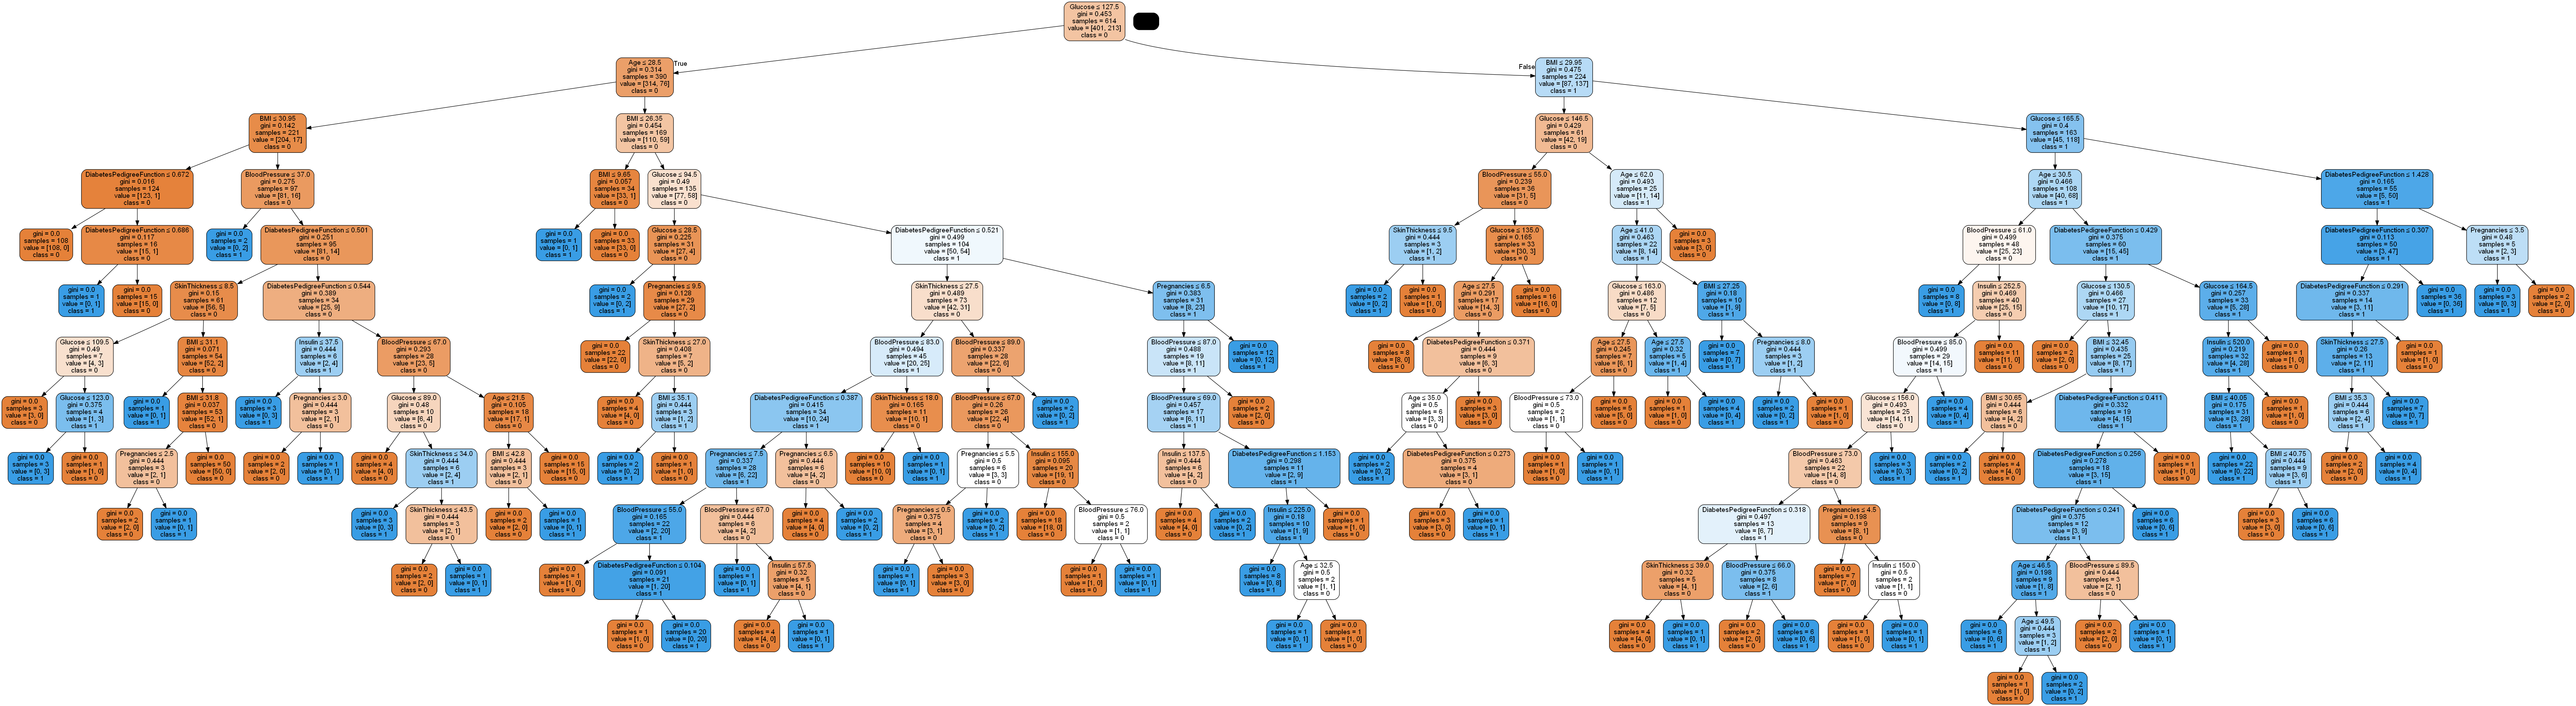

In [52]:
#Better Decision Tree Visualisation
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

# Random Forest

### Default Value

In [53]:
#Import Libraries
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators = 1000, random_state = 0)
rf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred1 = rf.predict(X_test)

# Model Accuracy
print(f'Accuracy -\n{accuracy_score(Y_test, Y_pred1)}')

Accuracy -
0.7402597402597403


### Default Values (using pprint)

In [28]:
from pprint import pprint

#Parameters currently in use

print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


## Cross Validation using Randomized Search 

In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, Y_train);

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

### Evaluation Function

In [31]:
import numpy as np
from sklearn.metrics import accuracy_score

np.seterr(invalid = 'ignore')#divide = 'ignore')#, invalid = 'ignore')

def evaluate(model, X_test, Y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - Y_test)
    accuracy = accuracy_score(predictions, Y_test)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print(f"Accuracy = {accuracy*100}%")
    
    return accuracy

### Evaluating the Default Model

In [32]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_test, Y_test)

Model Performance
Average Error: 0.2143 degrees.
Accuracy = 78.57142857142857%


### Evaluate the Best Random Search Model

In [33]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)

Model Performance
Average Error: 0.1818 degrees.
Accuracy = 81.81818181818183%


In [34]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 4.13%.


## Grid Search

In [35]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, Y_train);

grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

### Evaluate the Best Model from Grid Search

In [36]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, Y_test)

Model Performance
Average Error: 0.1948 degrees.
Accuracy = 80.51948051948052%


### Another Round of Grid Search

In [37]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [110, 120, None],
    'max_features': [3, 4],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [10],
    'n_estimators': [75, 100, 125]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search_final = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                 cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

# Fit the grid search to the data
grid_search_final.fit(X_train, Y_train);

grid_search_final.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 75}

In [38]:
grid_search_final.best_estimator_

RandomForestClassifier(max_depth=110, max_features=4, min_samples_leaf=6,
                       min_samples_split=10, n_estimators=75, random_state=42)

In [39]:
best_grid_final = grid_search_final.best_estimator_
grid_final_accuracy = evaluate(best_grid_final, X_test, Y_test)

Model Performance
Average Error: 0.1818 degrees.
Accuracy = 81.81818181818183%


### Final Model

In [40]:
final_model = grid_search.best_estimator_

print('Final Model Parameters:\n')
pprint(final_model.get_params())
print('\n')
grid_final_accuracy = evaluate(best_grid_final, X_test, Y_test)

Final Model Parameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 2,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Model Performance
Average Error: 0.1818 degrees.
Accuracy = 81.81818181818183%


### My attempt for manual hyperparameter tuning

In [41]:
#Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
X = np.array(X)
Y = np.array(Y)

# Import train_test_split function
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#Train Random Forest 
rf = RandomForestClassifier(n_estimators = 600, random_state = 42, min_samples_split = 10, min_samples_leaf = 10, max_features = 'sqrt', max_depth = 40, bootstrap = False)
rf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = rf.predict(X_test)

# Model Accuracy
print(f'Accuracy -\n{accuracy_score(Y_test, Y_pred)*100}%')

Accuracy -
82.46753246753246%
